# Course 5 Automatidata project (2nd notebook)

***

## Project Description

we will create and run a multiple linear regression (MLR) model to get the most accurate prediction. Because we want to predict ride duration based on multiple variables, including time of day and pickup and dropoff location, MLR will be our confirmation of how best to proceed with the ML algorithm in the final phase of the project. 

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import squarify

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd


import datetime
from datetime import datetime, timedelta, date

import scipy
from scipy import stats

import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict, RandomizedSearchCV

#from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor, plot_tree

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine
from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper, OutlierTrimmer
from feature_engine.selection import DropConstantFeatures, DropCorrelatedFeatures, DropDuplicateFeatures, SmartCorrelatedSelection

# This module lets us save our models once we fit them.
import pickle

import lux

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Yellow_Taxi_Trip_Data.csv", parse_dates=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [3]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [4]:
#df.intent([""])

In [5]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64       
 13  t

In [6]:
df.dtypes.value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [7]:
# Descriptive Statistical Analysis
df.describe(include="all")

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.00,22699,22699,22699.00,22699.00,22699.00,22699,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00,22699.00
unique,NaN,22435,22451,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2017-02-01 21:08:00,2017-11-08 22:34:00,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,3,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2017-01-01 00:08:00,2017-01-01 00:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2017-12-31 23:45:30,2017-12-31 23:49:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.56,NaN,NaN,1.64,2.91,1.04,NaN,162.41,161.53,1.34,13.03,0.33,0.50,1.84,0.31,0.30,16.31
std,0.50,NaN,NaN,1.29,3.65,0.71,NaN,66.63,70.14,0.50,13.24,0.46,0.04,2.80,1.40,0.02,16.10
min,1.00,NaN,NaN,0.00,0.00,1.00,NaN,1.00,1.00,1.00,-120.00,-1.00,-0.50,0.00,0.00,-0.30,-120.30
25%,1.00,NaN,NaN,1.00,0.99,1.00,NaN,114.00,112.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,8.75


In [8]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount'], dtype='object')

### Groupby Function

<p>The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.</p>


In [9]:
#df.groupby(["RatecodeID"], as_index=False).mean()

In [10]:
#df.groupby(["payment_type"], as_index=False).mean()

In [11]:
#df.groupby(["PULocationID"], as_index=False).mean()

In [12]:
#df.groupby(["DOLocationID"], as_index=False).mean()

### Univariate Data Exploration

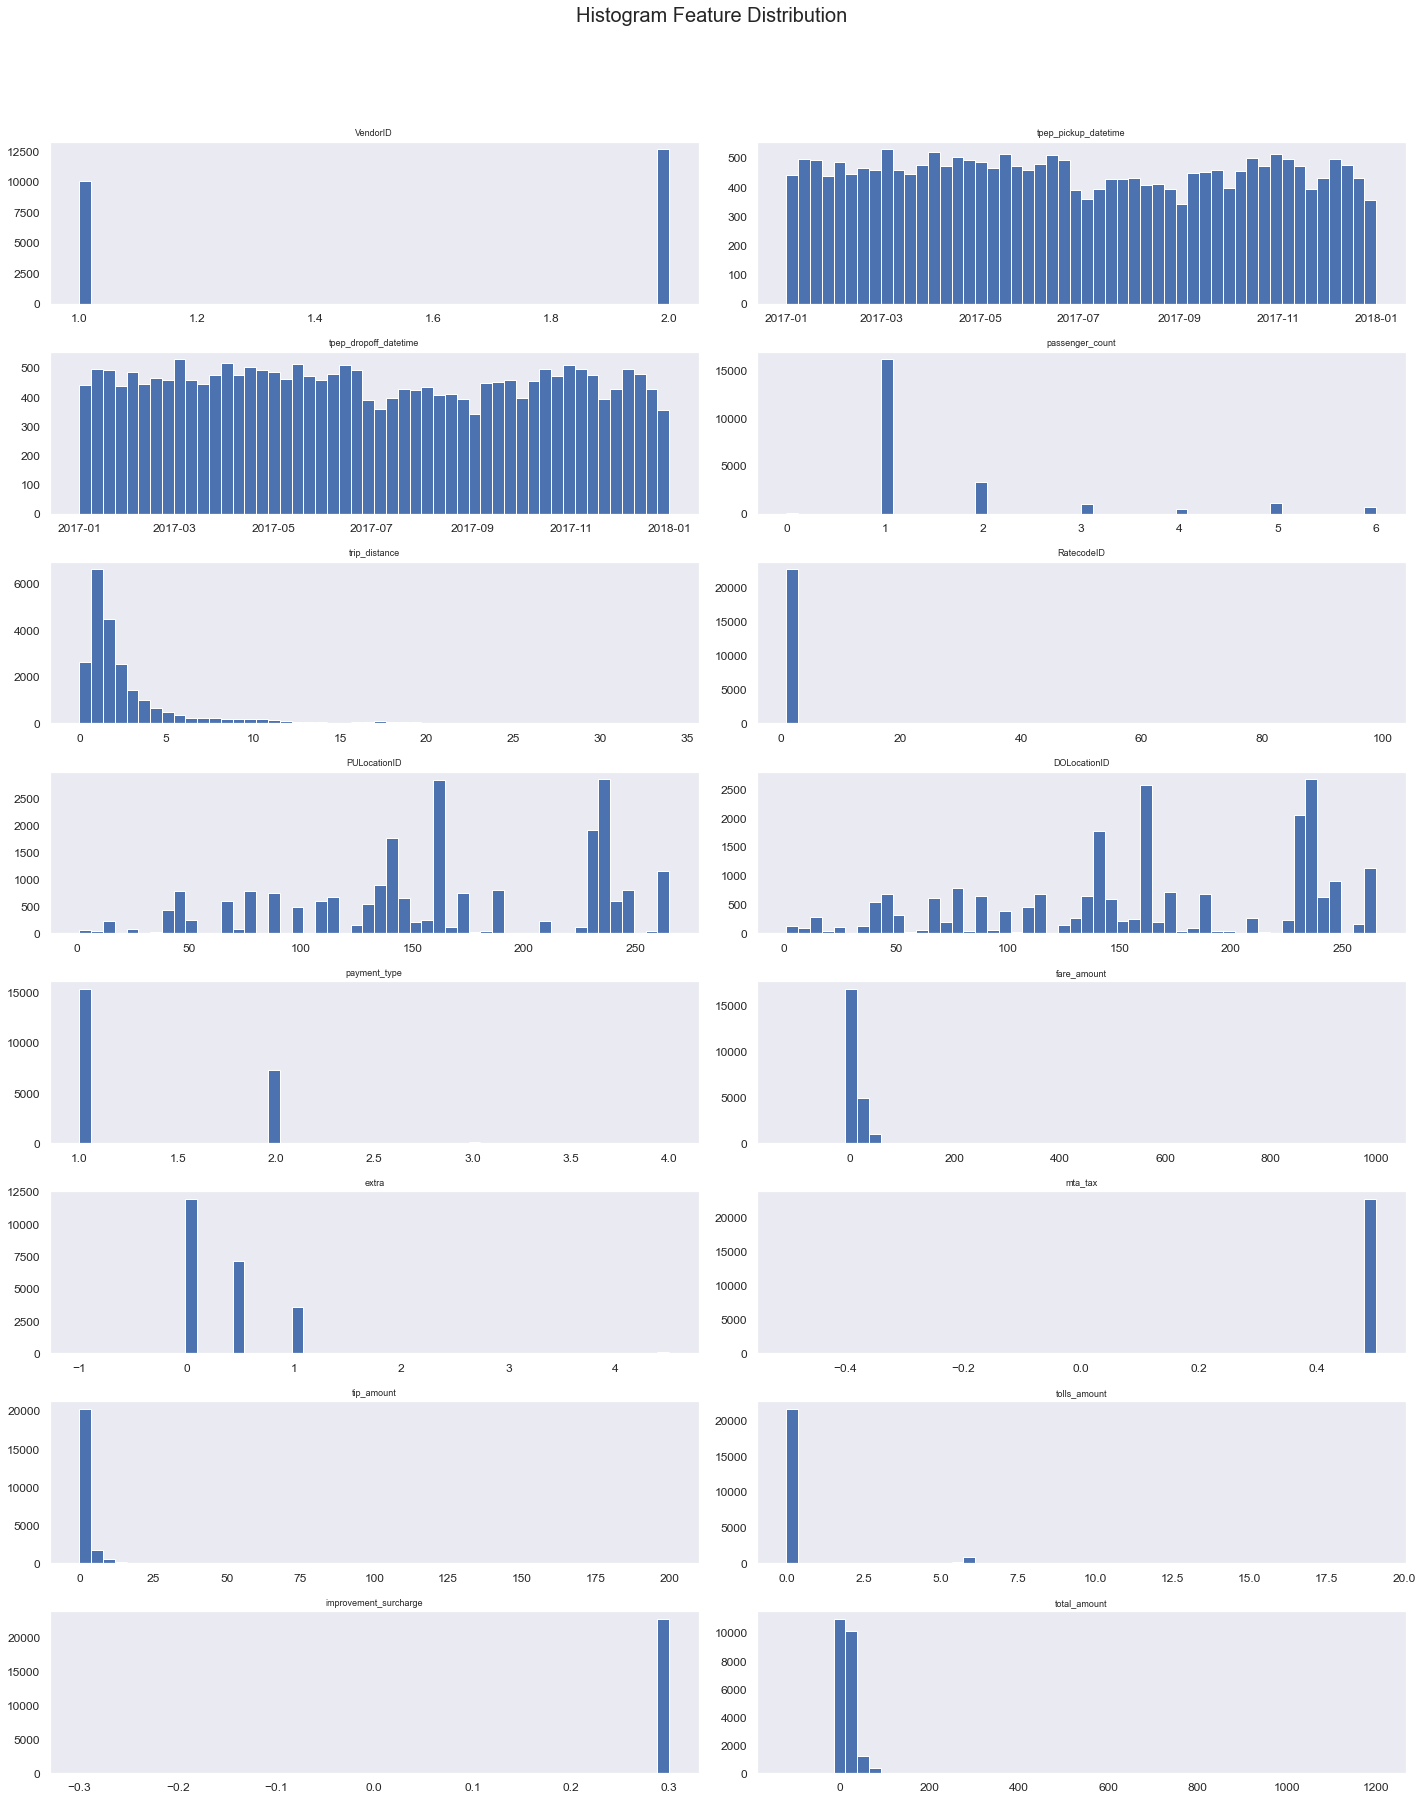

In [13]:
df.hist(bins=50, figsize=(20,50), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

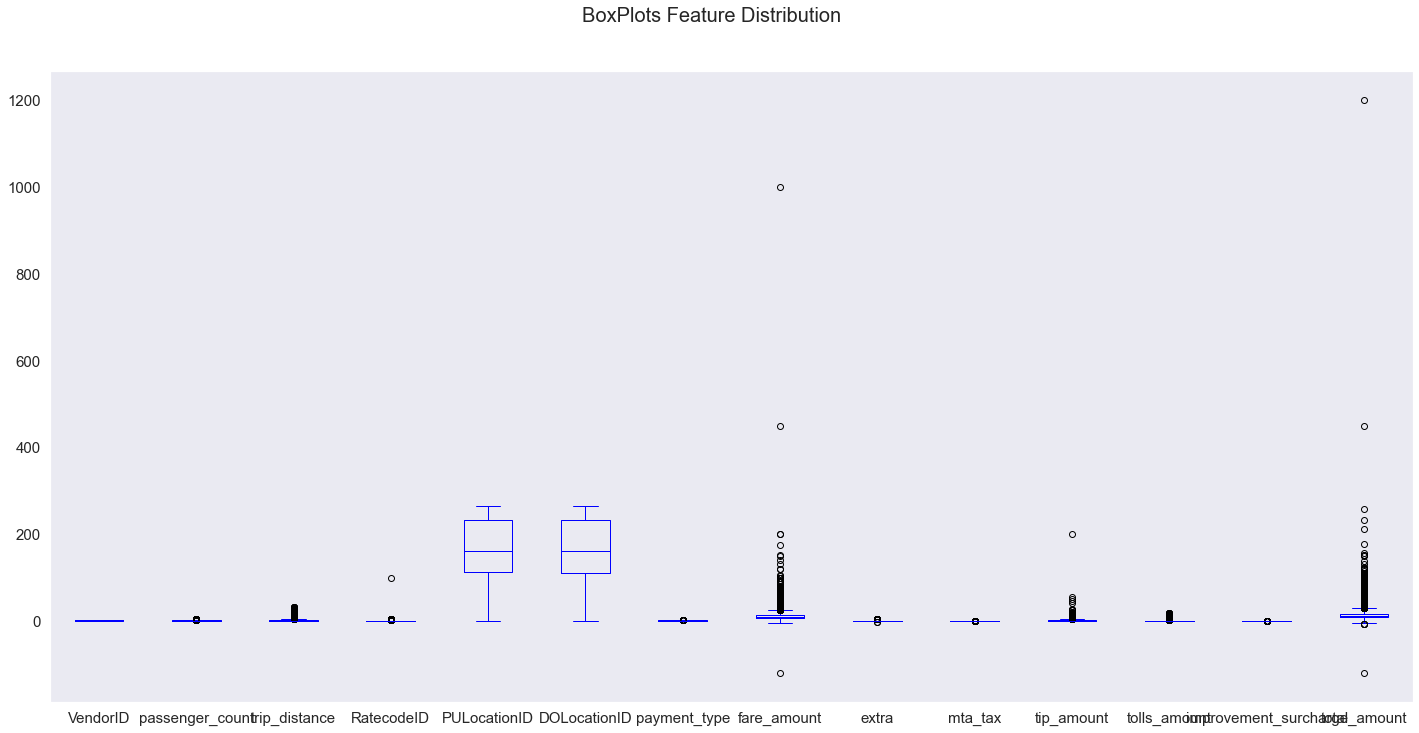

In [14]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15, grid=False)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

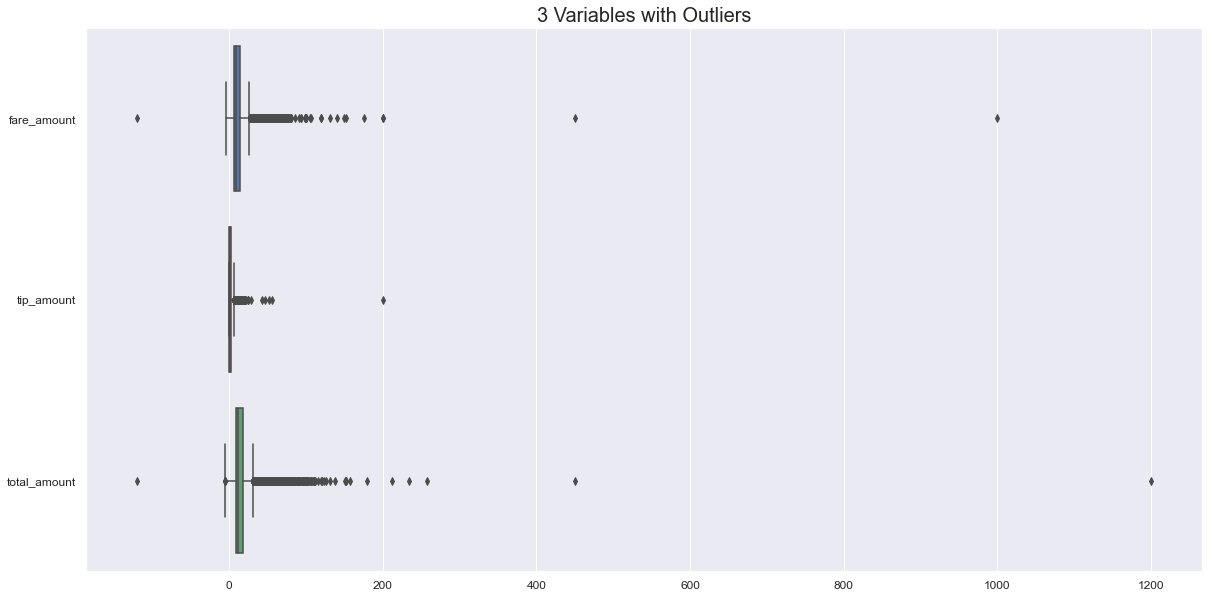

In [15]:
# Create boxplot to visualize the outliers
### YOUR CODE HERE ###

plt.figure(figsize=(20,10))
g = sns.boxplot(data=df[["fare_amount","tip_amount","total_amount"]], showfliers=True, orient="h")
g.set_title("3 Variables with Outliers",fontsize=20)
plt.show()

In [16]:
#df['RatecodeID'].value_counts().to_frame()

In [17]:
#df['store_and_fwd_flag'].value_counts().to_frame()

In [18]:
#df['payment_type'].value_counts().to_frame()

## Data Cleaning


### Date/Time Feature Extraction

In [19]:
df["tpep_pickup_datetime"].dtypes

dtype('<M8[ns]')

In [20]:
df["tpep_dropoff_datetime"].dtypes

dtype('<M8[ns]')

In [21]:
df["timediff"] = df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"]

In [22]:
df.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   VendorID               22699 non-null  int64          
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 3   passenger_count        22699 non-null  int64          
 4   trip_distance          22699 non-null  float64        
 5   RatecodeID             22699 non-null  int64          
 6   store_and_fwd_flag     22699 non-null  object         
 7   PULocationID           22699 non-null  int64          
 8   DOLocationID           22699 non-null  int64          
 9   payment_type           22699 non-null  int64          
 10  fare_amount            22699 non-null  float64        
 11  extra                  22699 non-null  float64        
 12  mta_tax                22699 non-null  float64

In [23]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,timediff
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0 days 00:14:04
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0 days 00:26:00
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0 days 00:07:12
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0 days 00:31:00
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0 days 00:16:43


In [24]:
df['minutes'] = df['timediff'].dt.total_seconds()/60

In [25]:
df["minutes"].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [26]:
df["minutes"] = abs(df["minutes"])

In [27]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,timediff,minutes
0,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.00,0.00,0.50,2.76,0.00,0.30,16.56,0 days 00:14:04,14.07
1,1,2017-04-11 14:53:00,2017-04-11 15:19:00,1,1.80,1,N,186,43,1,16.00,0.00,0.50,4.00,0.00,0.30,20.80,0 days 00:26:00,26.00
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.50,0.00,0.50,1.45,0.00,0.30,8.75,0 days 00:07:12,7.20
3,2,2017-05-07 13:17:00,2017-05-07 13:48:00,1,3.70,1,N,188,97,1,20.50,0.00,0.50,6.39,0.00,0.30,27.69,0 days 00:31:00,31.00
4,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.50,0.50,0.50,0.00,0.00,0.30,17.80,0 days 00:16:43,16.72


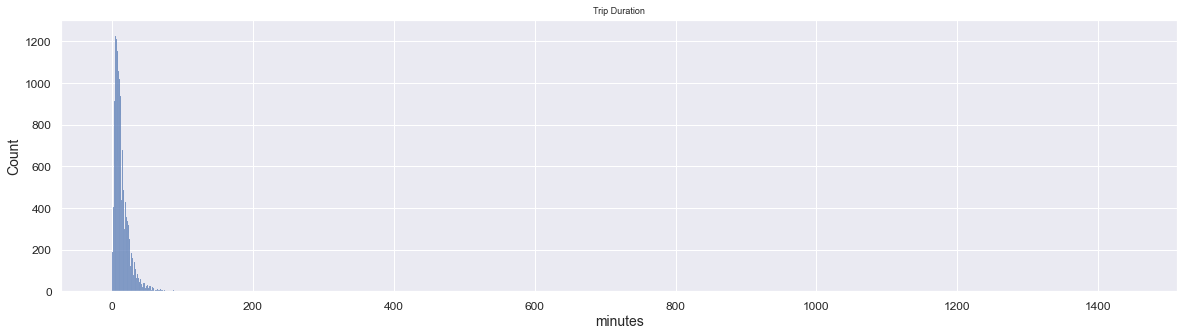

In [28]:
plt.figure(figsize=(20,5))
sns.histplot(data=df.minutes)
plt.title("Trip Duration")
plt.show()

In [29]:
df["minutes"].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [30]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'timediff'], axis=1, inplace=True)

In [31]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [32]:
#df.to_csv("taxitrip.csv", index=False)

### Count Encoding with Pandas

In [33]:
countPU = df['PULocationID'].value_counts().to_dict()
countPU

{237: 890,
 161: 861,
 186: 792,
 236: 785,
 162: 779,
 170: 749,
 234: 749,
 48: 741,
 230: 739,
 142: 649,
 138: 623,
 79: 617,
 163: 611,
 107: 590,
 239: 583,
 164: 576,
 68: 555,
 132: 532,
 141: 488,
 249: 483,
 100: 469,
 90: 463,
 229: 436,
 231: 423,
 238: 421,
 263: 392,
 140: 383,
 264: 345,
 148: 342,
 113: 325,
 114: 303,
 246: 297,
 43: 292,
 233: 279,
 144: 277,
 137: 262,
 262: 259,
 158: 249,
 143: 241,
 13: 227,
 50: 227,
 151: 191,
 87: 188,
 211: 184,
 75: 158,
 125: 145,
 261: 130,
 166: 124,
 88: 89,
 41: 82,
 74: 81,
 24: 62,
 4: 60,
 224: 53,
 45: 47,
 226: 43,
 42: 40,
 232: 39,
 209: 37,
 7: 37,
 181: 37,
 65: 36,
 255: 33,
 116: 32,
 25: 25,
 97: 24,
 244: 22,
 260: 21,
 145: 20,
 146: 18,
 33: 18,
 40: 18,
 179: 18,
 52: 17,
 223: 16,
 152: 14,
 265: 14,
 256: 14,
 80: 13,
 193: 11,
 129: 10,
 66: 10,
 49: 9,
 12: 9,
 93: 7,
 112: 7,
 189: 6,
 37: 6,
 17: 6,
 243: 6,
 70: 5,
 28: 5,
 106: 5,
 82: 5,
 36: 4,
 188: 4,
 95: 4,
 1: 3,
 247: 3,
 61: 3,
 29: 2,
 9

In [34]:
# Replace labels with counts
df['PULocationID'] = df['PULocationID'].map(countPU)

In [35]:
countDO = df['DOLocationID'].value_counts().to_dict()
countDO

{161: 858,
 236: 802,
 230: 761,
 237: 759,
 170: 699,
 162: 681,
 234: 661,
 186: 653,
 48: 619,
 142: 612,
 239: 568,
 163: 557,
 68: 521,
 141: 518,
 164: 472,
 79: 467,
 107: 462,
 238: 440,
 246: 427,
 229: 411,
 231: 406,
 249: 391,
 263: 369,
 137: 366,
 140: 356,
 100: 355,
 233: 342,
 90: 334,
 264: 304,
 113: 299,
 43: 285,
 143: 278,
 148: 266,
 262: 261,
 114: 259,
 75: 249,
 138: 247,
 50: 246,
 158: 239,
 13: 230,
 144: 224,
 132: 212,
 211: 193,
 87: 190,
 166: 185,
 74: 176,
 151: 167,
 41: 141,
 125: 123,
 232: 121,
 261: 117,
 88: 110,
 4: 101,
 255: 91,
 42: 90,
 7: 89,
 181: 89,
 224: 89,
 244: 86,
 45: 68,
 145: 68,
 116: 67,
 226: 66,
 209: 63,
 24: 61,
 265: 60,
 112: 59,
 33: 57,
 256: 55,
 80: 51,
 152: 50,
 243: 50,
 65: 47,
 25: 44,
 49: 43,
 61: 41,
 17: 39,
 223: 38,
 129: 38,
 37: 35,
 95: 34,
 1: 34,
 66: 32,
 97: 31,
 146: 29,
 225: 26,
 12: 24,
 36: 23,
 179: 22,
 52: 22,
 127: 21,
 82: 21,
 189: 20,
 260: 19,
 106: 19,
 14: 19,
 193: 18,
 40: 18,
 257:

In [36]:
# Replace labels with counts
df['DOLocationID'] = df['DOLocationID'].map(countDO)

In [37]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [38]:
df.shape

(22699, 16)

In [39]:
df[["PULocationID", "DOLocationID"]].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [40]:
#df.to_csv("taxitrip.csv", index=False)

### One-hot encoding

In [41]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'minutes'], dtype='object')

In [42]:
cat_col = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type']

In [43]:
df_cat = pd.get_dummies(data=df, columns=cat_col, drop_first=True)

In [44]:
df_cat

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [45]:
df = df_cat.copy()

In [46]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [47]:
#df.to_csv("taxitrip.csv", index=False)

### Remove unwanted data

From statistics, there were zero passengers, zero tips, negative fare paid which needs to be removed

In [48]:
df["passenger_count"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [49]:
df["trip_distance"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [50]:
df["fare_amount"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [51]:
df["extra"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [52]:
df["mta_tax"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [53]:
df["tip_amount"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [54]:
df["tolls_amount"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [55]:
df["improvement_surcharge"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [56]:
df["total_amount"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [57]:
df["minutes"].value_counts(sort=True).to_frame().sort_index()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

***

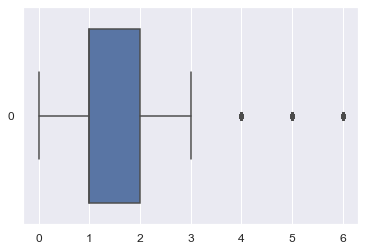

In [58]:
sns.boxplot(data=df["passenger_count"], showfliers=True, orient="h")
plt.show()

In [59]:
df[df['passenger_count'] == 0][:5]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [60]:
df2 = df[df['passenger_count'] != 0]

In [61]:
df2.reset_index(drop=True, inplace=True)

In [62]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [63]:
df = df2.copy()

In [64]:
#df.to_csv("taxitrip.csv", index=False)

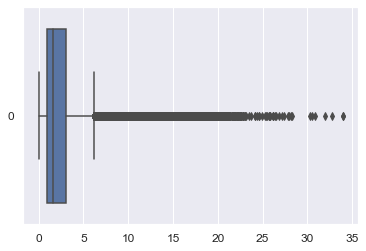

In [65]:
sns.boxplot(data=df["trip_distance"], showfliers=True, orient="h")
plt.show()

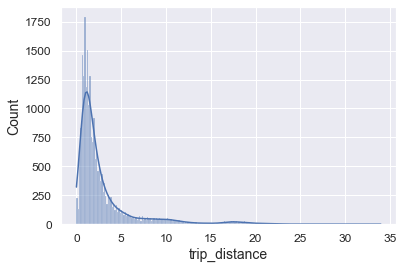

In [66]:
sns.histplot(kde=True, data=df.trip_distance)
plt.show()

In [67]:
df["trip_distance"].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [68]:
df[df['trip_distance'] == 0][:5]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [69]:
df2 = df[df['trip_distance'] != 0]

In [70]:
df2.reset_index(drop=True, inplace=True)

In [71]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [72]:
df = df2.copy()

In [73]:
#df.to_csv("taxitrip.csv", index=False)

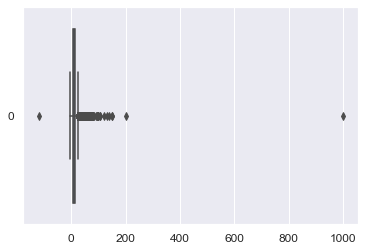

In [74]:
sns.boxplot(data=df["fare_amount"], showfliers=True, orient="h")
plt.show()

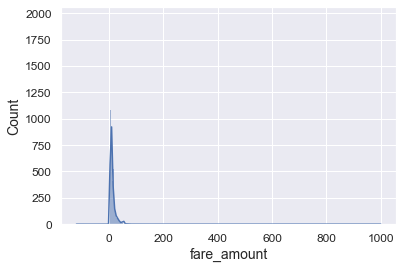

In [75]:
sns.histplot(kde=True, data=df.fare_amount)
plt.show()

In [76]:
(df['fare_amount'] == 0).value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [77]:
df2 = df[df['fare_amount'] != 0]

In [78]:
df2.reset_index(drop=True, inplace=True)

In [79]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [80]:
df = df2.copy()

In [81]:
#df.to_csv("taxitrip.csv", index=False)

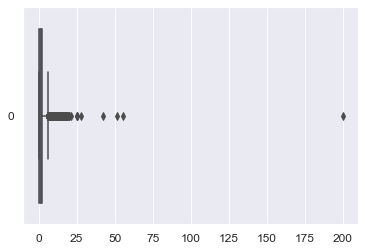

In [82]:
sns.boxplot(data=df["tip_amount"], showfliers=True, orient="h")
plt.show()

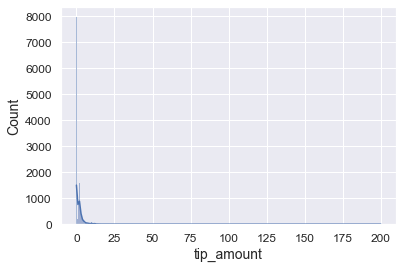

In [83]:
sns.histplot(kde=True, data=df.tip_amount)
plt.show()

In [84]:
(df['tip_amount'] == 0).value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [85]:
df[df['tip_amount'] == 0][:5]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [86]:
df2 = df[df['tip_amount'] != 0]

In [87]:
df2.reset_index(drop=True, inplace=True)

In [88]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [89]:
df = df2.copy()

In [90]:
#df.to_csv("taxitrip.csv", index=False)

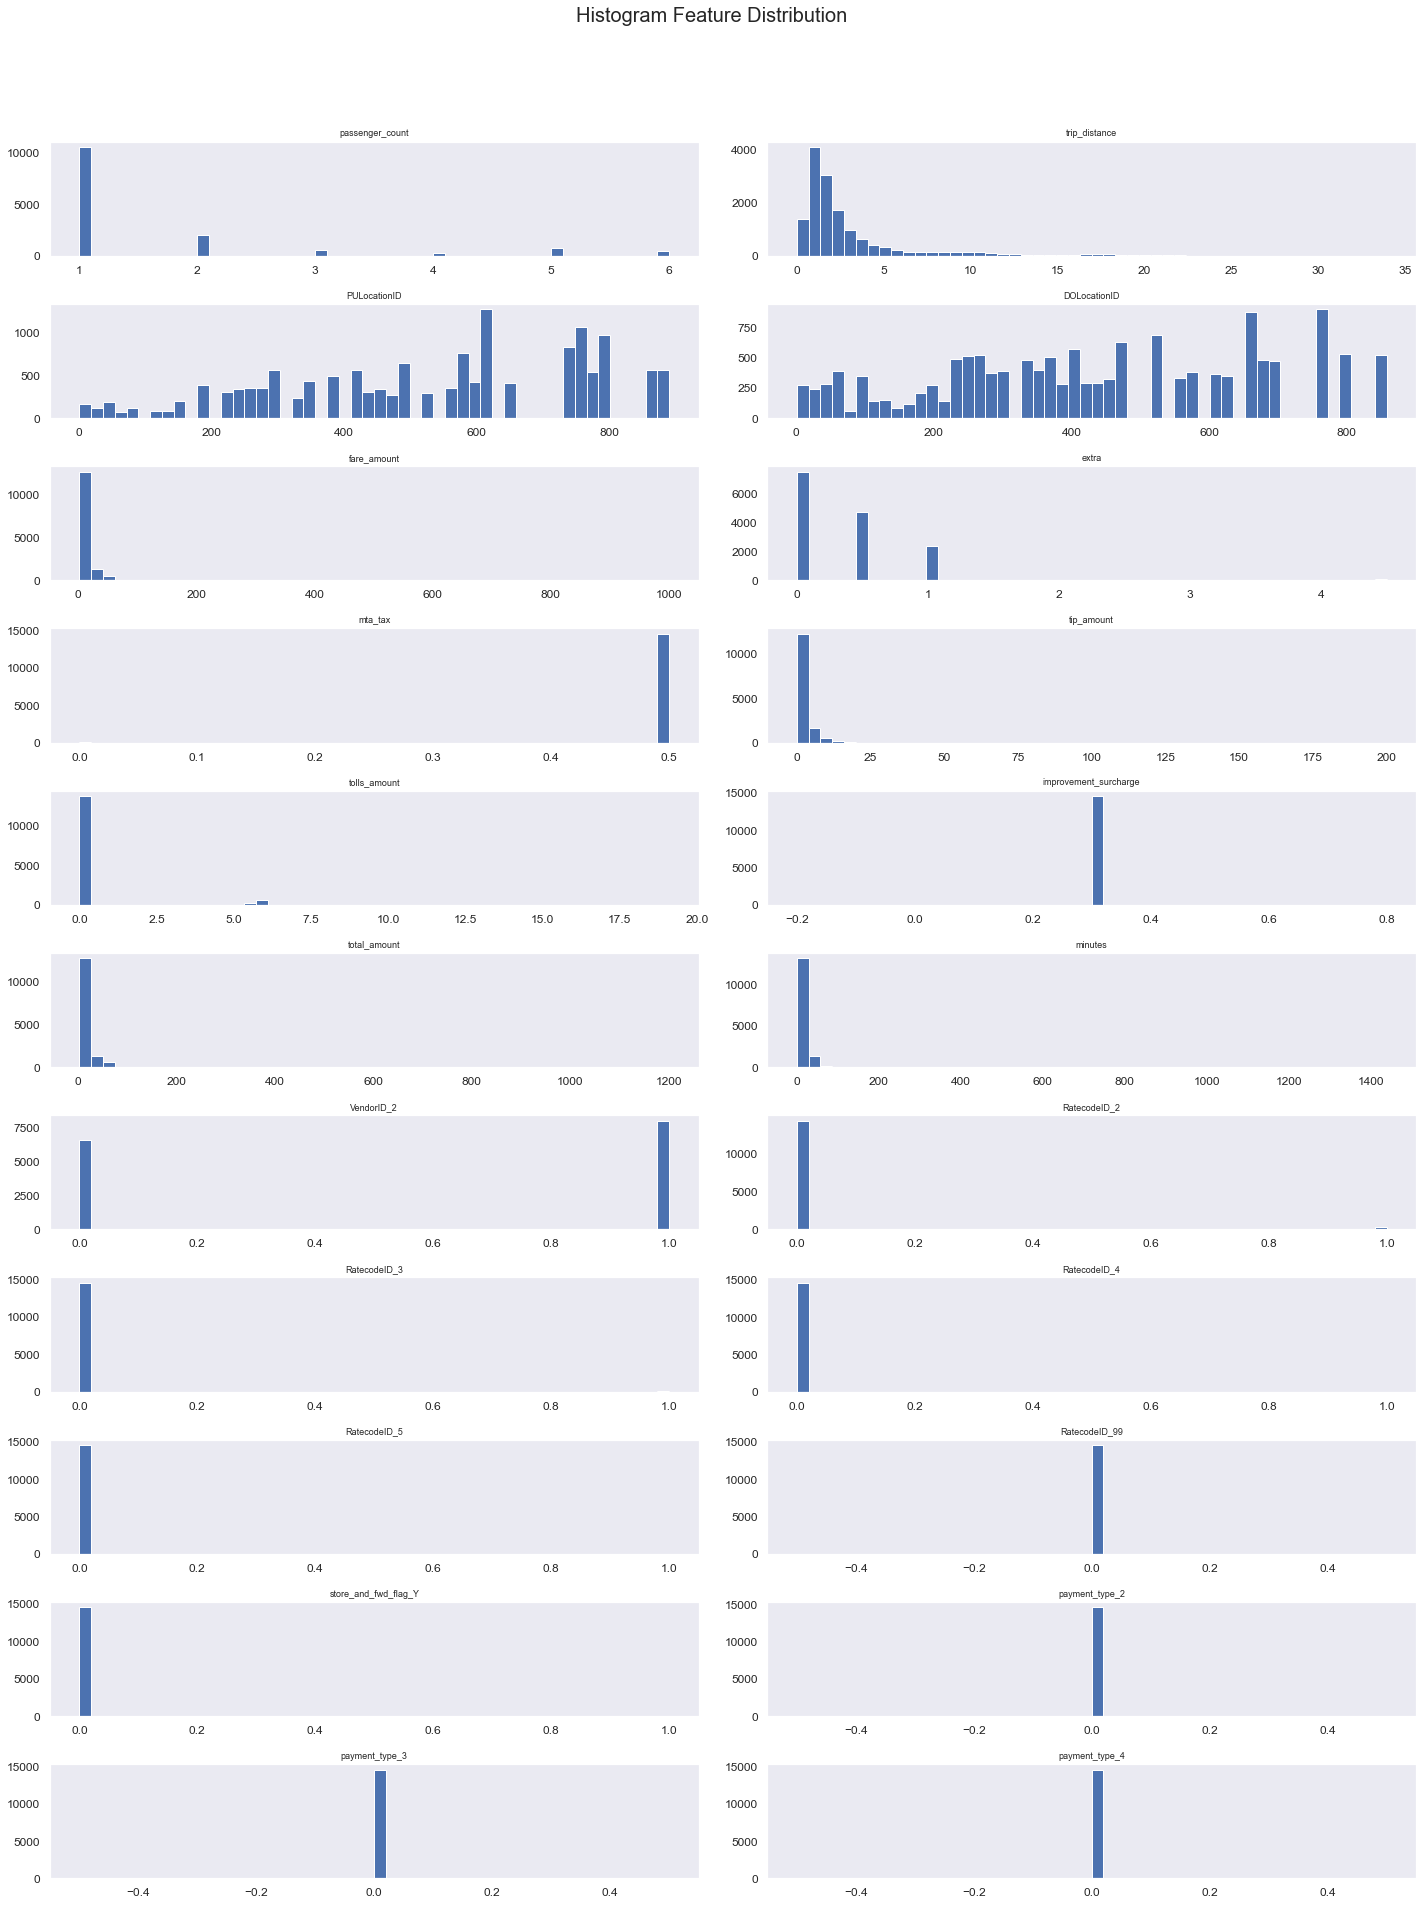

In [91]:
df.hist(bins=50, figsize=(20,50), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

### Treat Missing Values

<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

In [92]:
df.isnull().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Treat Duplicate Values

In [93]:
df.duplicated(keep='first').sum()

1

In [94]:
#Check duplicate values
df[df.duplicated(keep=False)].head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [95]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [96]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [97]:
#df.to_csv("taxitrip.csv", index=False)

### Capping / Censoring outliers

In [98]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

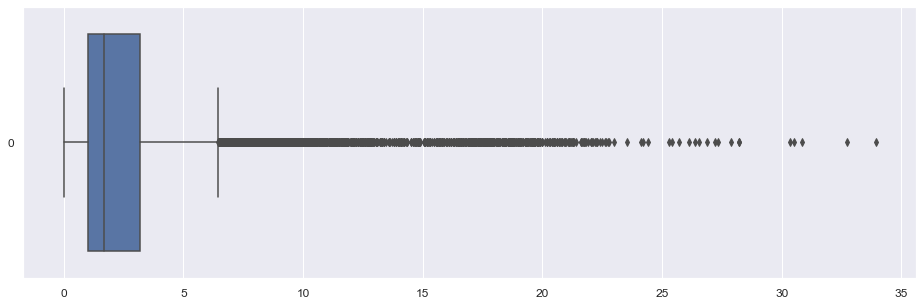

In [99]:
plt.figure(figsize=(16,5))
sns.boxplot(data=df["trip_distance"], showfliers=True, orient="h")
plt.show()

In [100]:
(df['trip_distance'] == 10).value_counts().to_frame()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [101]:
# Filter only journeys more than 10 miles
df[df["trip_distance"] > 10]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [102]:
# Keep only max 10 miles journey
df2 = df[df["trip_distance"] <= 10]
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [103]:
df2.reset_index(drop=True, inplace=True)

In [104]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [105]:
df2.trip_distance.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [106]:
df = df2.copy()

In [107]:
#df.to_csv("taxitrip.csv", index=False)

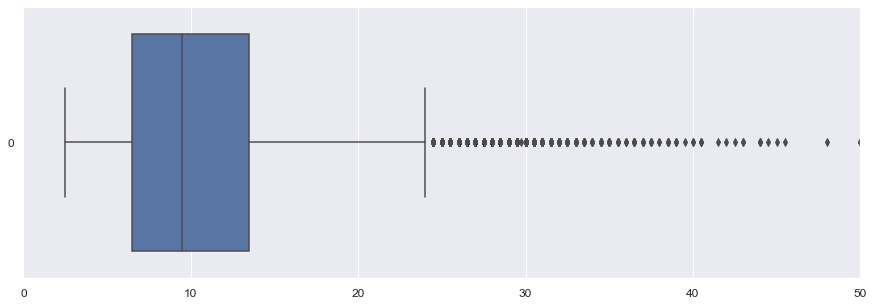

In [108]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df["fare_amount"], showfliers=True, orient="h")
plt.xlim((0, 50))
plt.show()

In [109]:
df.fare_amount.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [110]:
# Check how many fare exceeds
df[df["fare_amount"] > 15]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [111]:
# Keep max fare to less than 15
df2 = df[df["fare_amount"] < 15]
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [112]:
df2["fare_amount"].describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [113]:
df2.reset_index(drop=True, inplace=True)

In [114]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [115]:
df = df2.copy()

In [116]:
#df.to_csv("taxitrip.csv", index=False)

In [117]:
df.describe()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

### Rearrange Columns

In [118]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [119]:
df.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'minutes', 'VendorID_2', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y', 'payment_type_2', 'payment_type_3', 'payment_type_4'], dtype='object')

In [120]:
df = df[['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 
         'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'VendorID_2', 'RatecodeID_2', 'RatecodeID_3',
         'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y', 'payment_type_2', 'payment_type_3',
         'payment_type_4', 'minutes']]

In [121]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [122]:
#df.to_csv("taxitrip.csv", index=False)

# Data Visualization

In [123]:
df.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'VendorID_2', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'minutes'], dtype='object')

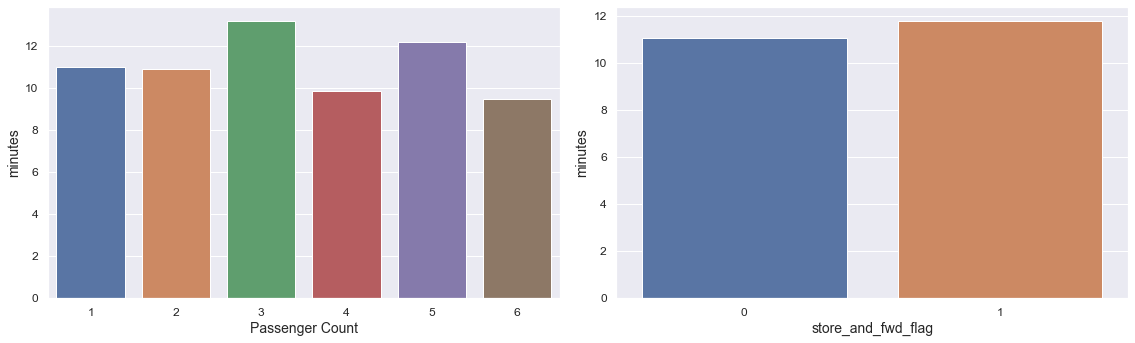

In [124]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
#fig.suptitle('Main Title')

sns.barplot(x="passenger_count", y="minutes", data=df, ax=ax[0], ci=None)
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("Passenger Count")
ax[0].set_ylabel("minutes")

sns.barplot(x="store_and_fwd_flag_Y", y="minutes", data=df, ax=ax[1], ci=None)
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("store_and_fwd_flag")
ax[1].set_ylabel("minutes")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

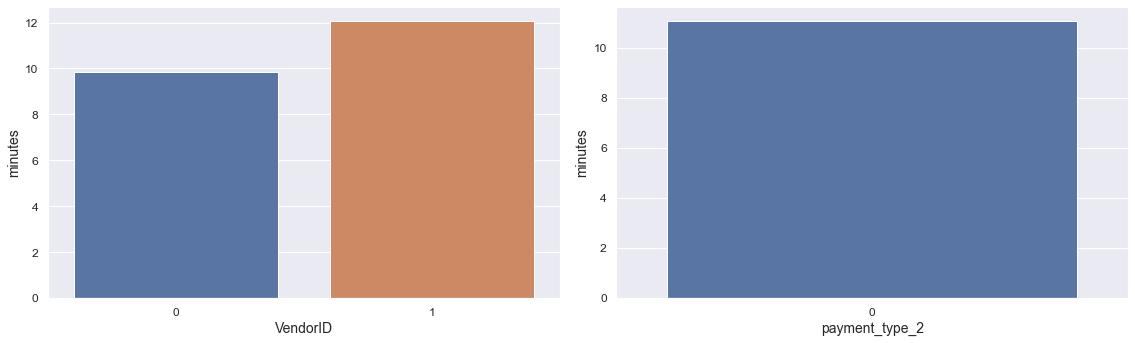

In [125]:
# Plot 1 rows and 2 columns (can be expanded)

fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
#fig.suptitle('Main Title')

sns.barplot(x="VendorID_2", y="minutes", data=df, ax=ax[0], ci=None)
#ax[0].set_title('Title of the first chart')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("VendorID")
ax[0].set_ylabel("minutes")

sns.barplot(x="payment_type_2", y="minutes", data=df, ax=ax[1], ci=None)
#ax[1].set_title('Title of the second chart')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("payment_type_2")
ax[1].set_ylabel("minutes")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

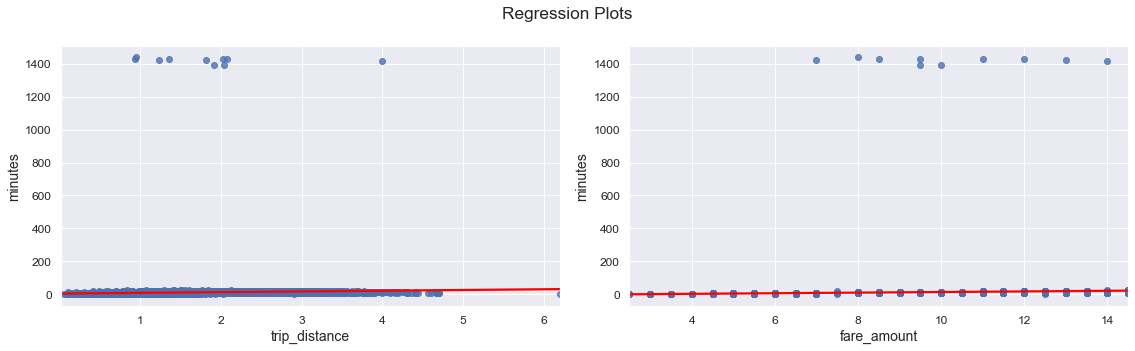

In [126]:
# Plot 1 rows and 2 columns (can be expanded)
line_color = {'color': 'red'}
fig, ax = plt.subplots(1,2, sharex=False, figsize=(16,5))
fig.suptitle('Regression Plots')

sns.regplot(x=df.trip_distance, y=df.minutes, data=df, ax=ax[0], ci=None, line_kws=line_color)
#ax[0].set_title('title')
#ax[0].tick_params('x', labelrotation=45)
ax[0].set_xlabel("trip_distance")
ax[0].set_ylabel("minutes")

sns.regplot(x=df.fare_amount, y=df.minutes, data=df, ax=ax[1], ci=None, line_kws=line_color)
#ax[1].set_title('title')
#ax[1].tick_params('x', labelrotation=45)
ax[1].set_xlabel("fare_amount")
ax[1].set_ylabel("minutes")

plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

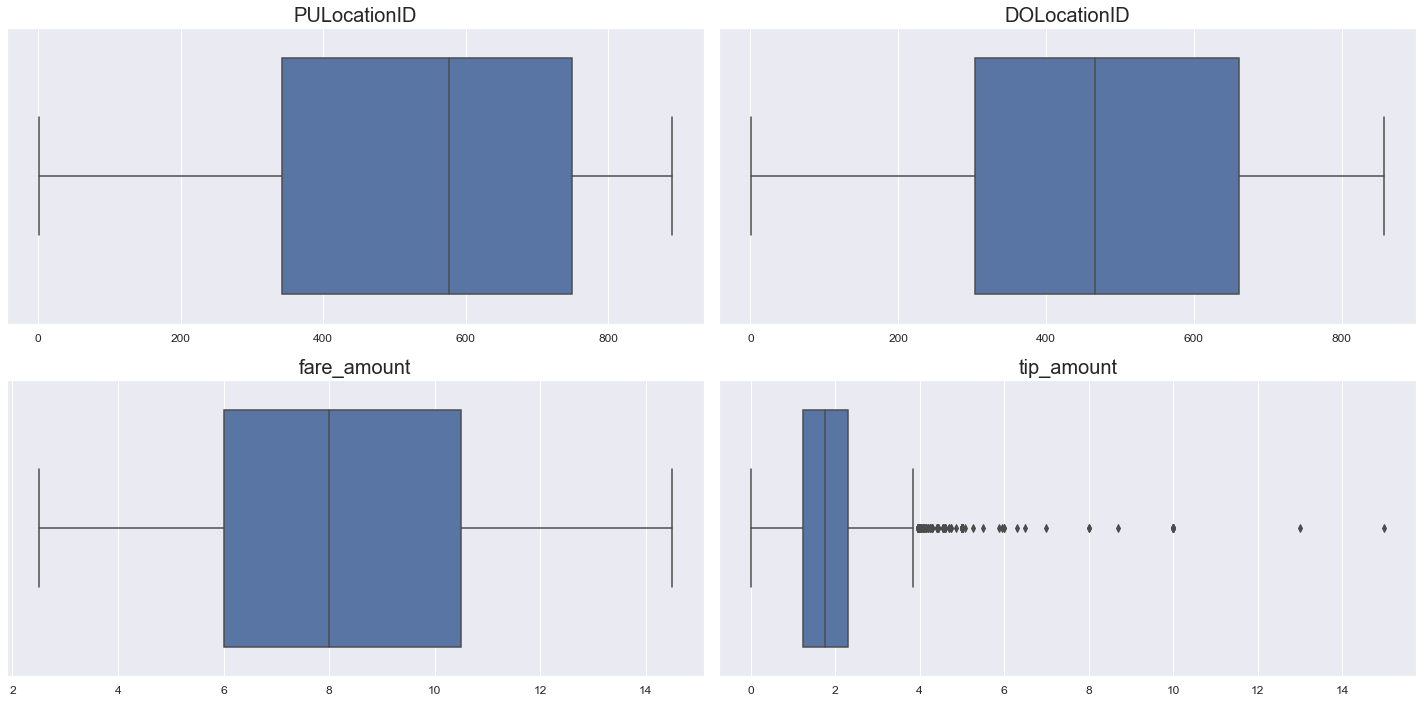

In [127]:
#Plot 2 by 2 subplots

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, sharex=False, figsize=(20,10))
#fig.suptitle('Main Title', y=0.5)

sns.boxplot(x="PULocationID", data=df, ax=ax1)
ax1.set_title('PULocationID', size=20)
#ax1.tick_params('x', labelrotation=45)
ax1.set_xlabel("")
ax1.set_ylabel("")

sns.boxplot(x="DOLocationID", data=df, ax=ax2)
ax2.set_title('DOLocationID', size=20)
#ax2.tick_params('x', labelrotation=45)
ax2.set_xlabel("")
ax2.set_ylabel("")

sns.boxplot(x="fare_amount", data=df, ax=ax3)
ax3.set_title('fare_amount', size=20)
#ax3.tick_params('x', labelrotation=45)
ax3.set_xlabel("")
ax3.set_ylabel("")

sns.boxplot(x="tip_amount", data=df, ax=ax4)
ax4.set_title('tip_amount', size=20)
#ax4.tick_params('x', labelrotation=45)
ax4.set_xlabel("")
ax4.set_ylabel("")

plt.tight_layout()
plt.show()

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two. Correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

<b>P-value</b>

<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [128]:
df.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [129]:
df.corr()["minutes"].sort_values()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

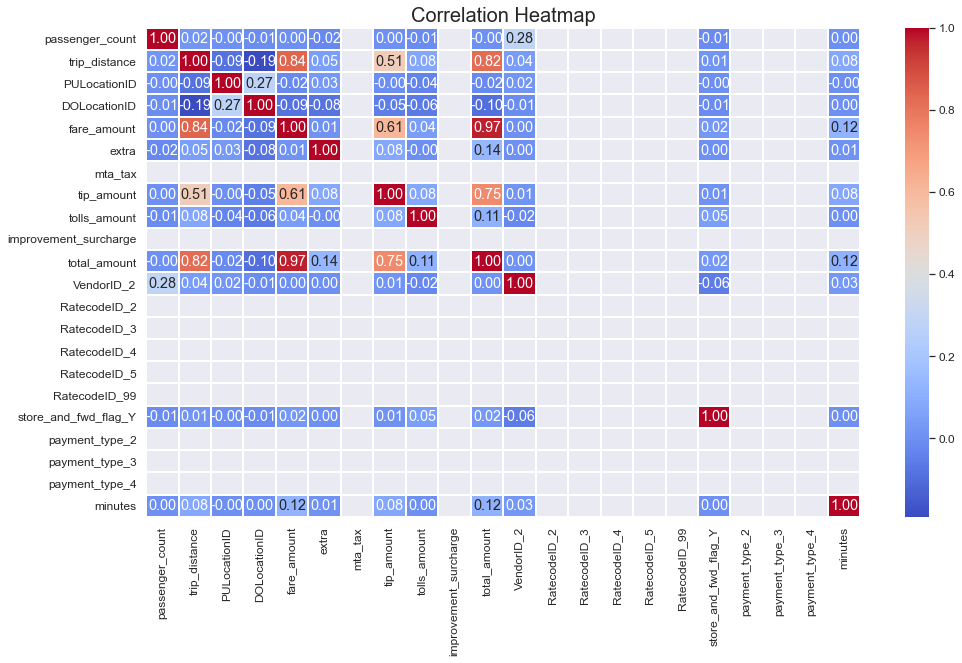

In [130]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

## Feature Selection

In practice, feature selection should be done after data pre-processing,
so ideally, all the categorical variables are encoded into numbers,
and then you can assess how deterministic they are of the target

In [131]:
df

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [132]:
df.shape

(10856, 22)

In [133]:
X = df.iloc[:,0:21]
y = df.iloc[:,21]

In [134]:
X.values, y.values

(array([[  6.  ,   3.34, 469.  , ...,   0.  ,   0.  ,   0.  ],
        [  1.  ,   1.  , 259.  , ...,   0.  ,   0.  ,   0.  ],
        [  6.  ,   2.3 , 861.  , ...,   0.  ,   0.  ,   0.  ],
        ...,
        [  1.  ,   0.89, 436.  , ...,   0.  ,   0.  ,   0.  ],
        [  1.  ,   2.36, 555.  , ...,   0.  ,   0.  ,   0.  ],
        [  1.  ,   2.1 , 583.  , ...,   0.  ,   0.  ,   0.  ]]),
 array([14.06666667,  7.2       ,  8.        , ...,  9.        ,
        11.93333333, 14.        ]))

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8684, 21), (2172, 21), (8684,), (2172,))

In [137]:
scaler = StandardScaler()

In [138]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.48744343, -0.64439095,  1.40914544, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48744343, -1.0320488 , -1.24488974, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2990595 , -0.106672  ,  0.17319768, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.48744343, -1.13208953,  1.07955937, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48744343,  0.40603676,  0.88007307, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48744343,  0.48106731,  1.53490854, ...,  0.        ,
         0.        ,  0.        ]])

In [139]:
# we stack all the selection methods inside a pipeline

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', DropCorrelatedFeatures()),
])

In [140]:
pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation', DropCorrelatedFeatures())])

In [141]:
# remove features

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train.shape, X_test.shape

((8684, 8), (2172, 8))

In [142]:
X_train.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'extra', 'tip_amount', 'VendorID_2', 'store_and_fwd_flag_Y'], dtype='object')

In [143]:
sfs = SFS(estimator=LinearRegression(), 
          n_features_to_select=None,
          direction='backward',
          scoring='r2',
          cv=5,
          n_jobs=-1)

In [148]:
#sfs = sfs.fit(X_train, y_train)

In [149]:
#sfs.get_feature_names_out()

In [150]:
#sfs.n_features_to_select

## Regression Model

## StatsModel

In [151]:
df = pd.read_csv("taxitrip.csv")

In [152]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [153]:
# df.intent = ["minutes"]
# df

In [154]:
df.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'VendorID_2', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'minutes'], dtype='object')

In [155]:
# Write out OLS formula as a string
ols_formula = "minutes ~ passenger_count + trip_distance + PULocationID + DOLocationID + fare_amount \
+ extra + mta_tax + tip_amount + tolls_amount + improvement_surcharge + total_amount  \
+ C(VendorID_2) + C(RatecodeID_2) + C(RatecodeID_3) + C(RatecodeID_4) + C(RatecodeID_5) + C(RatecodeID_99) + C(store_and_fwd_flag_Y) + C(payment_type_2) + C(payment_type_3) + C(payment_type_4)"

In [156]:
linreg = smf.ols(ols_formula, data=df).fit()

In [157]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                minutes   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     17.59
Date:                Sat, 13 May 2023   Prob (F-statistic):           3.66e-35
Time:                        10:01:56   Log-Likelihood:                -56152.
No. Observations:               10856   AIC:                         1.123e+05
Df Residuals:                   10844   BIC:                         1.124e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -5.3349      2.457     -2.171      0.030     -10.152      -0.518
C(VendorID_2)[T.1]               2.6392      0.864      3.055      0.002       0.946       4.332
C(store_and_fwd_flag_Y)[T.1]    -0.3179      7.468     -0.043      0.966     -14.957      14.321
passenger_count                 -0.2006      0.335     -0.600      0.549      -0.856       0.455
trip_distance                   -4.2264      0.981     -4.308      0.000      -6.150      -2.303
PULocationID                    -0.0014      0.002     -0.769      0.442      -0.005       0.002
DOLocationID                     0.0014      0.002      0.663      0.508      -0.003       0.005
fare_amount                      3.7603      3.305      1.138      0.255      -2.717      10.238
extra                            2.2398      3.439      0.651      0.515      -4.501       8.981
mta_tax                         -2.6674      1.229     -2.171      0.030      -5.076      -0.259
tip_amount                       0.9250      3.329      0.278      0.781      -5.601       7.451
tolls_amount                     0.7198      3.895      0.185      0.853      -6.915       8.355
improvement_surcharge           -1.6005      0.737     -2.171      0.030      -3.046      -0.155
total_amount                    -0.9297      3.282     -0.283      0.777      -7.363       5.503
==============================================================================
Omnibus:                    29094.329   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        526902767.404
Skew:                          32.821   Prob(JB):                         0.00
Kurtosis:                    1080.286   Cond. No.                     9.83e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.49e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Looking at features less than p-values at 0.05

C(VendorID_2)[T.1], trip_distance, mta_tax, improvement_surcharge

In [158]:
# Repeat MLR with reduced variables
ols_formula2 = "minutes ~ trip_distance + fare_amount + mta_tax + improvement_surcharge + C(VendorID_2)"

In [159]:
linreg2 = smf.ols(ols_formula2, data=df).fit()

In [160]:
linreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                minutes   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     63.66
Date:                Sat, 13 May 2023   Prob (F-statistic):           8.50e-41
Time:                        10:02:04   Log-Likelihood:                -56154.
No. Observations:               10856   AIC:                         1.123e+05
Df Residuals:                   10852   BIC:                         1.123e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -5.7913      1.072     -5.401      0.000      -7.893      -3.689
C(VendorID_2)[T.1]        2.4724      0.826      2.995      0.003       0.854       4.091
trip_distance            -4.2024      0.949     -4.426      0.000      -6.063      -2.341
fare_amount               2.8181      0.265     10.654      0.000       2.300       3.337
mta_tax                  -2.8957      0.536     -5.401      0.000      -3.947      -1.845
improvement_surcharge    -1.7374      0.322     -5.401      0.000      -2.368      -1.107
==============================================================================
Omnibus:                    29097.994   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        527353221.426
Skew:                          32.832   Prob(JB):                         0.00
Kurtosis:                    1080.747   Cond. No.                     2.07e+32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-59. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Multiple Linear Regression (Scikit Learn)

To do this, you will first subset the variables of interest from the dataframe. You can do this by using double square brackets `[[]]`, and listing the names of the columns of interest.

Next, you can construct the linear regression formula, and save it as a string. Remember that the y or dependent variable comes before the `~`, and the x or independent variables comes after the `~`.

**Note:** The names of the x and y variables have to exactly match the column names in the dataframe.

Lastly, you can build the simple linear regression model in `statsmodels` using the `ols()` function. You can import the `ols()` function directly using the line of code below.

Then, you can plug in the `ols_formula` and `ols_data` as arguments in the `ols()` function. After you save the results as a variable, you can call on the `fit()` function to actually fit the model to the data.

First, we have to write out the formula as a string. Recall that we write out the name of the y variable first, followed by the tilde (`~`), and then each of the X variables separated by a plus sign (`+`). We can use `C()` to indicate a categorical variable. This will tell the `ols()` function to one hot encode those variables in the model. Please review the previous course materials as needed to review how and why we code categorical variables for regression.

In [161]:
df.shape

(10856, 22)

In [162]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [164]:
X = df[['trip_distance', 'fare_amount', 'mta_tax', 'improvement_surcharge', 'VendorID_2']]
y = df[["minutes"]]

In [165]:
X.values, y.values

(array([[ 3.34, 13.  ,  0.5 ,  0.3 ,  1.  ],
        [ 1.  ,  6.5 ,  0.5 ,  0.3 ,  0.  ],
        [ 2.3 ,  9.  ,  0.5 ,  0.3 ,  1.  ],
        ...,
        [ 0.89,  7.5 ,  0.5 ,  0.3 ,  1.  ],
        [ 2.36, 10.5 ,  0.5 ,  0.3 ,  1.  ],
        [ 2.1 , 11.  ,  0.5 ,  0.3 ,  0.  ]]),
 array([[14.06666667],
        [ 7.2       ],
        [ 8.        ],
        ...,
        [ 9.        ],
        [11.93333333],
        [14.        ]]))

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [167]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8684, 5), (2172, 5), (8684, 1), (2172, 1))

In [168]:
scaler = StandardScaler()

In [169]:
X_train_scaled = scaler.fit_transform(X_train)

In [170]:
X_test_scaled = scaler.fit(X_test)

In [171]:
lr = LinearRegression()

In [172]:
lr.fit(X_train,y_train)

LinearRegression()

In [173]:
lr_pred = lr.predict(X_test)
lr_pred

array([[10.12131232],
       [16.86471137],
       [14.04342711],
       ...,
       [ 4.68225971],
       [21.61421809],
       [ 0.20724718]])

In [174]:
lr.intercept_

array([-7.93105439])

In [175]:
lr.coef_

array([[-5.64799143,  3.08929995,  0.        ,  0.        ,  2.5888861 ]])

In [176]:
mse = mean_squared_error(y_test,lr_pred)
mse

1781.2555902339334

In [177]:
rmse = np.sqrt(mse)
rmse

42.20492376765931

In [178]:
r2score = r2_score(y_test,lr_pred)
r2score

0.015558830709526128

In [179]:
lr.score(X_train, y_train)

0.017429274900435554

In [180]:
lr.score(X_test, y_test)

0.015558830709526128

***

## Model evaluation and interpretation

Lastly, you can call the `summary()` function on the `model` object to get the coefficients and more statistics about the model. The output from `model.summary()` can be used to evaluate the model and interpret the results. Later in this section, we will go over how to read the results of the model output.

Use the `.summary()` function to get a summary table of model results and statistics.

Once we have our summary table, we can interpret and evaluate the model. In the upper half of the table, we get several summary statistics. We'll focus on `R-squared`, which tells us how much variation in body mass (g) is explained by the model. An `R-squared` of 0.85 is fairly high, and this means that 85% of the variation in body mass (g) is explained by the model.

Turning to the lower half of the table, we get the beta coefficients estimated by the model and their corresponding 95% confidence intervals and p-values. Based on the p-value column, labeled `P>|t|`, we can tell that all of the X variables are statistically significant, since the p-value is less than 0.05 for every X variable.

### Residual Plots

eval_env: 1


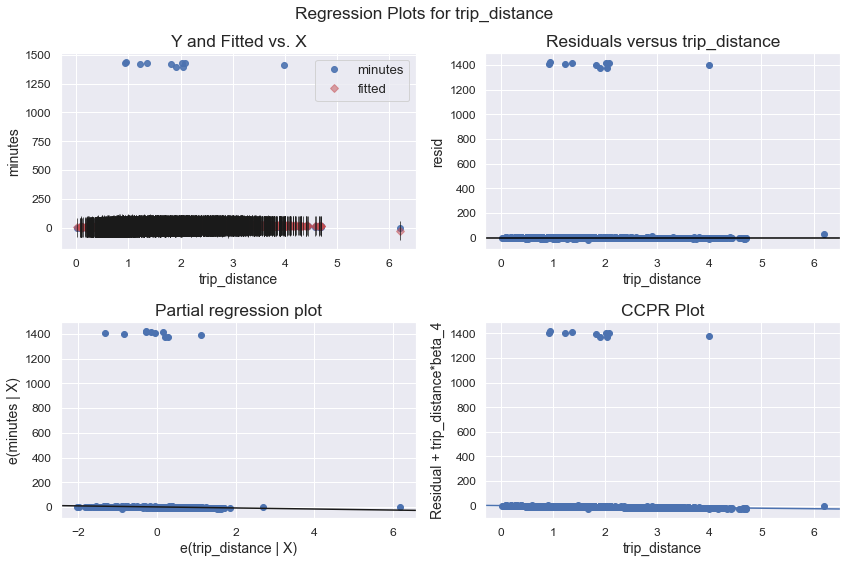

In [181]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(linreg, 'trip_distance', fig=fig)

<Figure size 864x576 with 0 Axes>

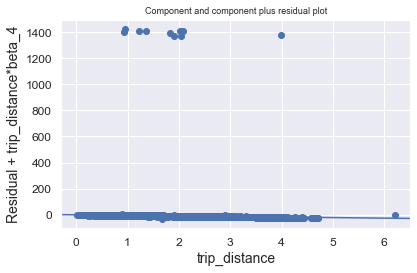

In [182]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(linreg, "trip_distance")
fig.tight_layout(pad=1.0)
plt.show()

## Check model assumptions

For multiple linear regression, there is an additional assumption added to the four simple linear regression assumptions: **multicollinearity**. 

Check that all five multiple linear regression assumptions are upheld for your model.

### Model assumption: Linearity

Create scatterplots comparing the continuous independent variable(s) you selected above with `Sales` to check the linearity assumption. Use the pairplot you created earlier to verify the linearity assumption or create new scatterplots comparing the variables of interest.

### Model assumption: Independence

The **independent observation assumption** states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Model assumption: Normality

Create the following plots to check the **normality assumption**:

* **Plot 1**: Histogram of the residuals
* **Plot 2**: Q-Q plot of the residuals

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

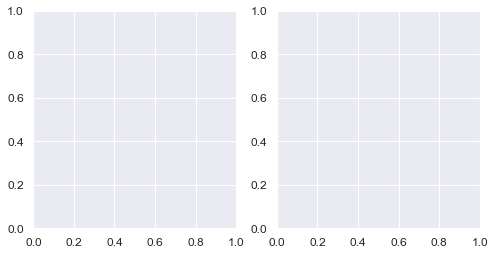

In [198]:
# Calculate the residuals.

### YOUR CODE HERE ### 

residuals = linreg.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()

### Model assumption: Constant variance

Check that the **constant variance assumption** is not violated by creating a scatterplot with the fitted values and residuals. Add a line at $y = 0$ to visualize the variance of residuals above and below $y = 0$.

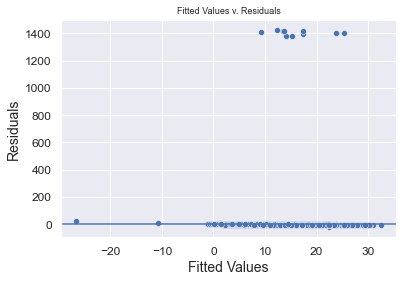

In [184]:
# Create a scatterplot with the fitted values from the model and the residuals.

### YOUR CODE HERE ### 

fig = sns.scatterplot(x = linreg.fittedvalues, y = linreg.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()

### Model assumption: No multicollinearity

The **no multicollinearity assumption** states that no two independent variables ($X_i$ and $X_j$) can be highly correlated with each other. 

Two common ways to check for multicollinearity are to:

* Create scatterplots to show the relationship between pairs of independent variables
* Use the variance inflation factor to detect multicollinearity

Use one of these two methods to check your model's no multicollinearity assumption.

In [185]:
df.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'VendorID_2', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'minutes'], dtype='object')

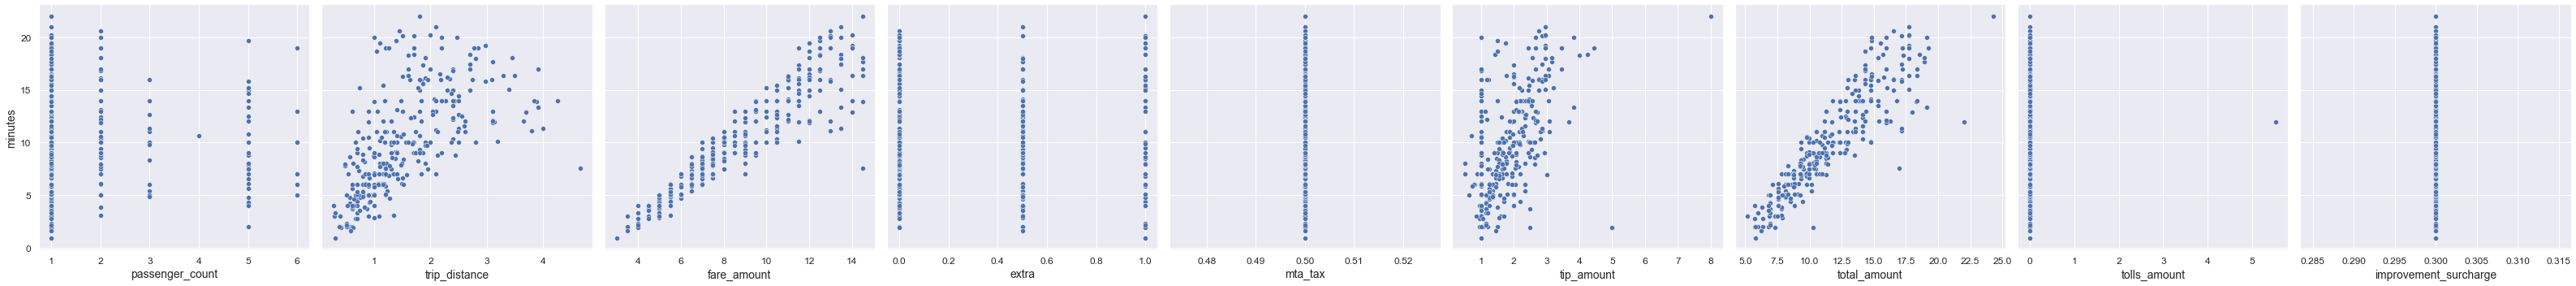

In [186]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(df.sample(300), x_vars=['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
                                     'tip_amount', 'total_amount', 'tolls_amount', 'improvement_surcharge'
                                    ], y_vars=["minutes"], height=5)
plt.show()

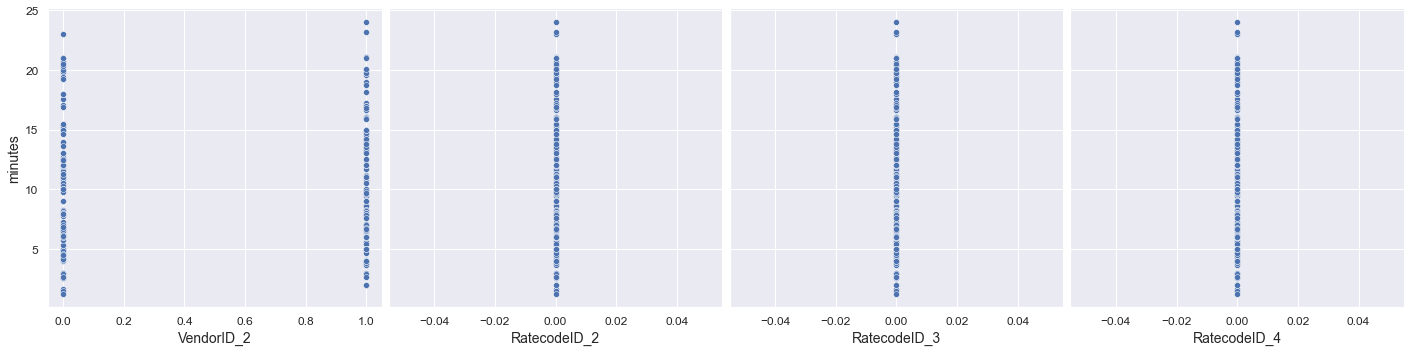

In [187]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(df.sample(300), x_vars=['VendorID_2', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4'], y_vars=["minutes"], height=5)
plt.show()

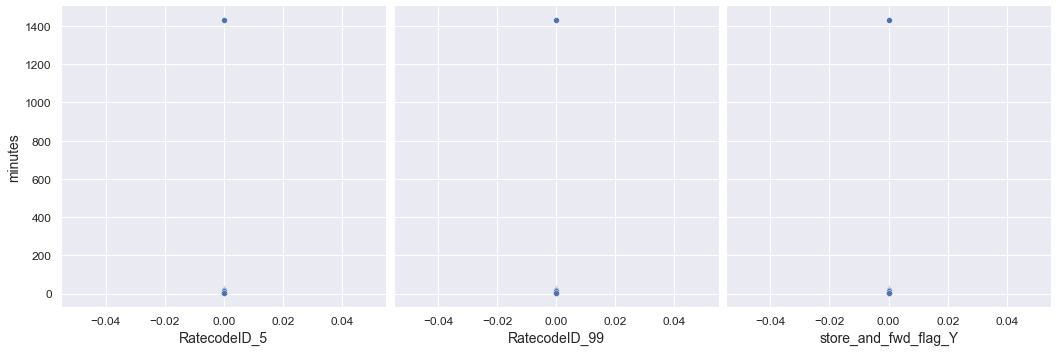

In [188]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(df.sample(300), x_vars=['RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y'], y_vars=["minutes"], height=5)
plt.show()

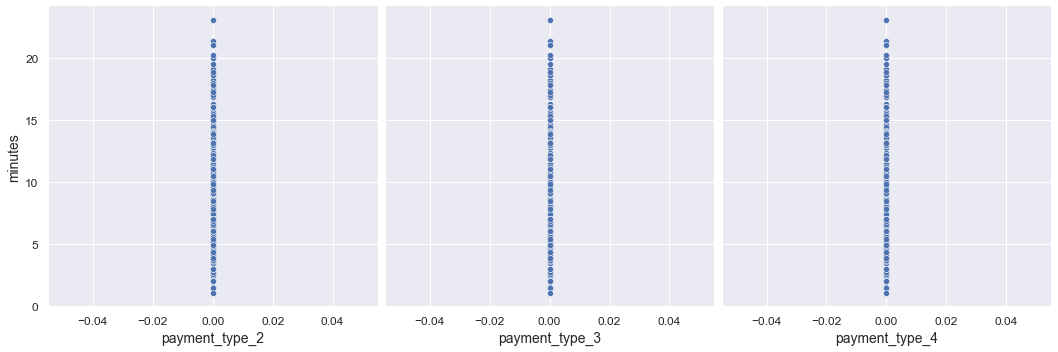

In [189]:
# Create a pairplot of the data.

### YOUR CODE HERE ### 

sns.pairplot(df.sample(300), x_vars=['payment_type_2', 'payment_type_3', 'payment_type_4'], y_vars=["minutes"], height=5)
plt.show()

In [190]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

# Create a subset of the data with the continous independent variables. 
X = df[['fare_amount', 'tip_amount']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

VIF between 1 and 5 = variables are moderately correlated

***

In [191]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [192]:
df.columns

Index(['passenger_count', 'trip_distance', 'PULocationID', 'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'VendorID_2', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'minutes'], dtype='object')

In [193]:
df2 = df[['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'minutes']]

In [194]:
df2.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [195]:
df2.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [199]:
# Repeat MLR with reduced variables
ols_formula3 = "minutes ~ trip_distance + fare_amount + tip_amount + total_amount"

In [200]:
linreg3 = smf.ols(ols_formula3, data=df).fit()

In [201]:
linreg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                minutes   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     45.64
Date:                Sat, 13 May 2023   Prob (F-statistic):           4.45e-38
Time:                        10:09:58   Log-Likelihood:                -56158.
No. Observations:               10856   AIC:                         1.123e+05
Df Residuals:                   10851   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.2000      1.732     -4.158      0.000     -10.594      -3.806
trip_distance    -4.0771      0.952     -4.285      0.000      -5.942      -2.212
fare_amount       2.0097      0.962      2.089      0.037       0.124       3.895
tip_amount       -0.7251      1.189     -0.610      0.542      -3.055       1.605
total_amount      0.7677      0.944      0.813      0.416      -1.084       2.619
==============================================================================
Omnibus:                    29110.257   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        528891895.241
Skew:                          32.868   Prob(JB):                         0.00
Kurtosis:                    1082.320   Cond. No.                         78.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## K Fold Cross Validation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.

<img src="k-fold.png">

In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a `KFold` object that  Provides train/test indices to split data into train/test sets in an iterative manner.

`n_splits`:  A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.

`shuffle`: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.

`random_state`: the random state.

In [202]:
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [203]:
lr_pred = cross_val_predict(lr, X, y, cv=kf, n_jobs=-1)

In [204]:
r2_score(y, lr_pred)

0.014068750193146684

## Cross Validation Score

Now, let's use *Scikit-Learn's* *K-fold cross-validation* method to see whether we can assess the performance of our model. The *K-fold cross-validation* method splits the training set into the number of folds (n_splits), as now in the Diagram above, if we have K folds, K-1 is used for training and one fold is used for testing. The input parameters are as follows:

<b>estimator</b>: The object to use to `fit` the data.

<b>X</b>: array-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.

<b>y</b>: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.

<b>scoring</b>: A str or a scorer callable object/ function with signature scorer (estimator, X, y) which should return only a single value.  See model evaluation [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01#scoring-parameter) for more information.

The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.


In [205]:
cv = cross_val_score(estimator=lr, X=X_train, y=y_train, scoring='r2', cv=5)

In [206]:
cv.mean()

0.018313892872323923

In [207]:
cv.std()

0.008960817969143067

In [208]:
-1 * cv

array([-0.01134089, -0.03529447, -0.01350257, -0.01198286, -0.01944867])

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training.

In [ ]:
#lr_pred_cv = cross_val_predict(estimator=lr, X=X_train[["disp"]], y=y_train, cv=5)

In [ ]:
#lr_pred_cv [0:5]

## Lasso Regression for Model Selection

Due to the fact that coefficients will be shrunk towards a mean of zero, less important features in a dataset are eliminated when penalized. The shrinkage of these coefficients based on the alpha value provided leads to some form of automatic feature selection, as input variables are removed in an effective approach.

In [209]:
df = pd.read_csv("taxitrip.csv")

In [210]:
df.shape

(10856, 22)

In [211]:
X = df.iloc[:,0:21]
y = df.iloc[:,21]

In [212]:
X.values, y.values

(array([[  6.  ,   3.34, 469.  , ...,   0.  ,   0.  ,   0.  ],
        [  1.  ,   1.  , 259.  , ...,   0.  ,   0.  ,   0.  ],
        [  6.  ,   2.3 , 861.  , ...,   0.  ,   0.  ,   0.  ],
        ...,
        [  1.  ,   0.89, 436.  , ...,   0.  ,   0.  ,   0.  ],
        [  1.  ,   2.36, 555.  , ...,   0.  ,   0.  ,   0.  ],
        [  1.  ,   2.1 , 583.  , ...,   0.  ,   0.  ,   0.  ]]),
 array([14.06666667,  7.2       ,  8.        , ...,  9.        ,
        11.93333333, 14.        ]))

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [214]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8684, 21), (2172, 21), (8684,), (2172,))

In [215]:
scaler = StandardScaler()

In [216]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.48744343, -0.64439095,  1.40914544, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48744343, -1.0320488 , -1.24488974, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2990595 , -0.106672  ,  0.17319768, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.48744343, -1.13208953,  1.07955937, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48744343,  0.40603676,  0.88007307, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48744343,  0.48106731,  1.53490854, ...,  0.        ,
         0.        ,  0.        ]])

In [217]:
lasso = Lasso(alpha=0.1, random_state=0)

In [218]:
sel = SelectFromModel(estimator=lasso)
sel

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=0))

In [219]:
sel.fit(X_train_scaled,y_train)

SelectFromModel(estimator=Lasso(alpha=0.1, random_state=0))

In [220]:
sel.get_support()

array([ True,  True,  True, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False])

In [221]:
selected_feat = X_train.columns[(sel.get_support())]
selected_feat

Index(['passenger_count', 'trip_distance', 'PULocationID', 'fare_amount', 'extra', 'VendorID_2'], dtype='object')

In [222]:
#Examine coefficients that shrank to zero
sel.estimator_.coef_ == 0

array([False, False, False,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [223]:
# we can identify the removed features like this:

removed_feats = X_train.columns[(sel.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['DOLocationID', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4', 'RatecodeID_5', 'RatecodeID_99', 'store_and_fwd_flag_Y', 'payment_type_2', 'payment_type_3', 'payment_type_4'], dtype='object')

In [226]:
df.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [246]:
df2 = df[['passenger_count', 'trip_distance', 'PULocationID', 'fare_amount', 'extra', 'VendorID_2','minutes']]

In [247]:
df2

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [248]:
df2.shape

(10856, 7)

In [250]:
X = df2.iloc[:,0:6]
y = df2.iloc[:,6]

In [251]:
X.values, y.values

(array([[  6.  ,   3.34, 469.  ,  13.  ,   0.  ,   1.  ],
        [  1.  ,   1.  , 259.  ,   6.5 ,   0.  ,   0.  ],
        [  6.  ,   2.3 , 861.  ,   9.  ,   0.5 ,   1.  ],
        ...,
        [  1.  ,   0.89, 436.  ,   7.5 ,   0.5 ,   1.  ],
        [  1.  ,   2.36, 555.  ,  10.5 ,   0.  ,   1.  ],
        [  1.  ,   2.1 , 583.  ,  11.  ,   0.  ,   0.  ]]),
 array([14.06666667,  7.2       ,  8.        , ...,  9.        ,
        11.93333333, 14.        ]))

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [253]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8684, 6), (2172, 6), (8684,), (2172,))

In [254]:
scaler = StandardScaler()

In [255]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.48744343, -0.64439095,  1.40914544, -0.16327989, -0.88026873,
         0.90394499],
       [-0.48744343, -1.0320488 , -1.24488974,  0.01134112,  0.45567214,
         0.90394499],
       [ 0.2990595 , -0.106672  ,  0.17319768,  0.18596213, -0.88026873,
         0.90394499],
       ...,
       [-0.48744343, -1.13208953,  1.07955937, -1.21100595, -0.88026873,
         0.90394499],
       [-0.48744343,  0.40603676,  0.88007307,  1.5829302 , -0.88026873,
         0.90394499],
       [-0.48744343,  0.48106731,  1.53490854,  0.53520414,  0.45567214,
        -1.106262  ]])

In [256]:
X_test_scaled = scaler.fit(X_test)

In [257]:
lasso = Lasso(alpha=1.0, random_state=0)

### Perform GridSearchCV

In [258]:
parameters= [{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters

[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [259]:
gs = GridSearchCV(estimator=lasso, param_grid=parameters, n_jobs=-1, cv=5)

In [261]:
gs.fit(X_train,y_train)

PicklingError: Could not pickle the task to send it to the workers.

In [240]:
gs.best_estimator_

Lasso(alpha=0.001, random_state=0)

In [241]:
gs.best_estimator_.score(X_test,y_test)

1.0

In [262]:
lasso2 = Lasso(alpha=0.001, random_state=0)

In [263]:
lasso2.fit(X_train_scaled,y_train)

Lasso(alpha=0.001, random_state=0)

In [264]:
lasso2_pred = lasso2.predict(X_test_scaled)

ValueError: Expected 2D array, got scalar array instead:
array=StandardScaler().
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
rd2_pred[0:5]

In [ ]:
rd2.intercept_

In [ ]:
rd2.coef_

In [ ]:
mse = mean_squared_error(y_test,rd2_pred)
mse

In [ ]:
rmse = np.sqrt(mse)
rmse

In [ ]:
r2score = r2_score(y_test,rd2_pred)
r2score

In [ ]:
rd2.score(X_train, y_train)

In [ ]:
rd2.score(X_test, y_test)

### Compare models

Create a table of results to compare model performance.

In [ ]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###

table = pd.DataFrame()
table = table.append({'Model': "Linear Regression",
                        'MAE':  "N/A",
                        'MSE': 0.935863,
                        'RMSE': 0.955197,
                        'R2': 0.940864
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Ridge Regression",
                        'MAE':  "N/A",
                        'MSE': 0.944501,
                        'RMSE': 0.950128,
                        'R2': 0.942450
                      },
                        ignore_index=True
                    )

table = table.append({'Model': "Extra Trees",
                        'MAE':  "N/A",
                        'MSE': "N/A",
                        'RMSE': "N/A",
                        'R2': "N/A"
                      },
                        ignore_index=True
                    )

table

## Pickle  

When models take a long time to fit, you don’t want to have to fit them more than once. If your kernel disconnects or you shut down the notebook and lose the cell’s output, you’ll have to refit the model, which can be frustrating and time-consuming. 

`pickle` is a tool that saves the fit model object to a specified location, then quickly reads it back in. It also allows you to use models that were fit somewhere else, without having to train them yourself.

In [ ]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

This step will ***W***rite (i.e., save) the model, in ***B***inary (hence, `wb`), to the folder designated by the above path. In this case, the name of the file we're writing is `rf_cv_model.pickle`.

In [ ]:
# Pickle the model
with open(path+'rf_val_model.pickle', 'wb') as to_write:
    pickle.dump(rf_val, to_write)

Once we save the model, we'll never have to re-fit it when we run this notebook. Ideally, we could open the notebook, select "Run all," and the cells would run successfully all the way to the end without any model retraining. 

For this to happen, we'll need to return to the cell where we defined our grid search and comment out the line where we fit the model. Otherwise, when we re-run the notebook, it would refit the model. 

Similarly, we'll also need to go back to where we saved the model as a pickle and comment out those lines.  

Next, we'll add a new cell that reads in the saved model from the folder we already specified. For this, we'll use `rb` (read binary) and be sure to assign the model to the same variable name as we used above, `rf_cv`.

In [ ]:
# Open pickled model
with open(path+'rf_val_model.pickle', 'rb') as to_read:
    rf_val = pickle.load(to_read)

#### Python code done by Dennis Lam